# CMPINF-0010 Final Project (The Foodies)

Our group has chosen the metric of which neighborhood produces the "best" food in Pittsburgh. Along with access to fresh, locally-grown food, the cleanlieness of prepared food options plays an important role. I will examine trends of restaurants not passing inspection, and look for patterns that indicate the best neighborhoods in terms of prepared food safety/quality.

### My Submetric: Restaurant/Food Facility Inspections and Locations

![inspection](https://media.giphy.com/media/xULW8xwbxgeSN9X2ww/giphy.gif))

### Goal of my Analysis:

My sub-metric is Restaurant/Food Facility Inspections and Locations. Passing inspections is important in order to keep restraunts open and running while serving the best quality food. I want to find trends in certain areas passing/not passing inspections. At the end, I will find which neighborhood has the best cleanliness in this important food setting.

### Data Preview:

In [15]:
import pandas as pd

data = pd.read_csv('data/alco-restuarant-violations.csv')
data.head()

,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,city,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
0,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Toxic Items,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
1,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Certified Food Protection Manager,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
2,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Probe-Type Thermometers,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
3,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Employee Personal Hygiene,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
4,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Handwashing Facilities,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...


### The Best Neighborhood (According to my Sub-Metric)

First, lets begin by simplifying the data down to only the columns we care about. We only want our data sets to include facility name, city, rating, low, medium, and high.

In [16]:
import pandas as pd
import math

data = pd.read_csv('data/alco-restuarant-violations.csv')
newdata = data[['facility_name','city', 'rating', 'high', 'medium', 'low', "zip"]]

#for i, report in newdata.iterrows():
    #if(not math.isnan(newdata.at[i, "zip"])):
        #newdata.at[i, "zip"] = int(newdata.at[i, "zip"])
        
newdata.head(10)

,facility_name,city,rating,high,medium,low,zip
0,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
1,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
2,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
3,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
4,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
5,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
6,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
7,Station Street Food,Pittsburgh,V,F,F,F,15206.0
8,Co Go's #346,Homestead,V,F,F,F,15120.0
9,Co Go's #346,Homestead,V,NaN,NaN,NaN,15120.0


Next, we will split all the restraunts into 2 seperate groups, regarding their rating. Group V does not pass inspection and has a violation, meanwhile Group N passes inspection with no violations.

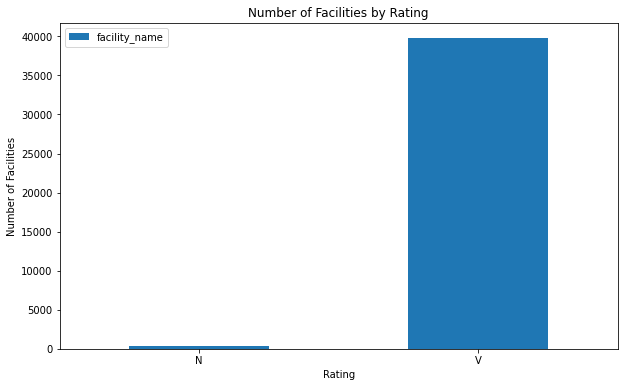

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/alco-restuarant-violations.csv')
newdata2 = data[['facility_name', 'rating']]

# Group the data by rating and count the number of facilities in each rating category
rating_counts = newdata2.groupby('rating').count()

# Create a bar chart
ax = rating_counts.plot(kind='bar', figsize=(10, 6), rot=0)

# Set the chart title and axis labels
ax.set_title('Number of Facilities by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Facilities')

# Show the chart
plt.show()

Now we want to count the number of restraunts in each neighborhood that have a violation. In order to do this we must import the geoemtric data using geopandas to find the neighborhood locations.

In [18]:
import pandas as pd
import geopandas as gdp
import requests
from io import StringIO
import matplotlib.pyplot as plt

neighborhoods_url = 'https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff'

response_neighborhoods = requests.get(neighborhoods_url)
csv_data_neighborhoods = StringIO(response_neighborhoods.text)

df_neighborhoods = pd.read_csv(csv_data_neighborhoods)

url_neighborhood_boundaries = 'https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson'
gdf_neighborhood_boundaries = gdp.read_file(url_neighborhood_boundaries)
gdf_neighborhood_boundaries["Violations"] = 0
gdf_neighborhood_boundaries["zip_code"] = None

main_dataset = gdf_neighborhood_boundaries[["hood", "geometry", "Violations", "zip_code"]]
zip_boundaries = gdp.read_file("data/Allegheny_County_Zip_Code_Boundaries.geojson")

zip_boundaries.head(10)

for i, thing in zip_boundaries.iterrows():
    for j, otherthing in main_dataset.iterrows():
        if thing["geometry"].intersects(otherthing["geometry"]):
            main_dataset.at[j, "zip_code"] = zip_boundaries.at[i, "ZIP"]

temp_data = newdata[newdata["rating"] == "V"]

#here we want to iterate through violation data (newdata) and increment Violation counter in main_dataset

test = temp_data.value_counts("zip")
for zip_index, count in test.items():
    for q, hood in main_dataset.iterrows():
        if zip_index == float(main_dataset.at[q, "zip_code"]):
            main_dataset.at[q, "Violations"] = count


Now that we have the data in our main dataframe, let's plot it to gain a visual understanding:

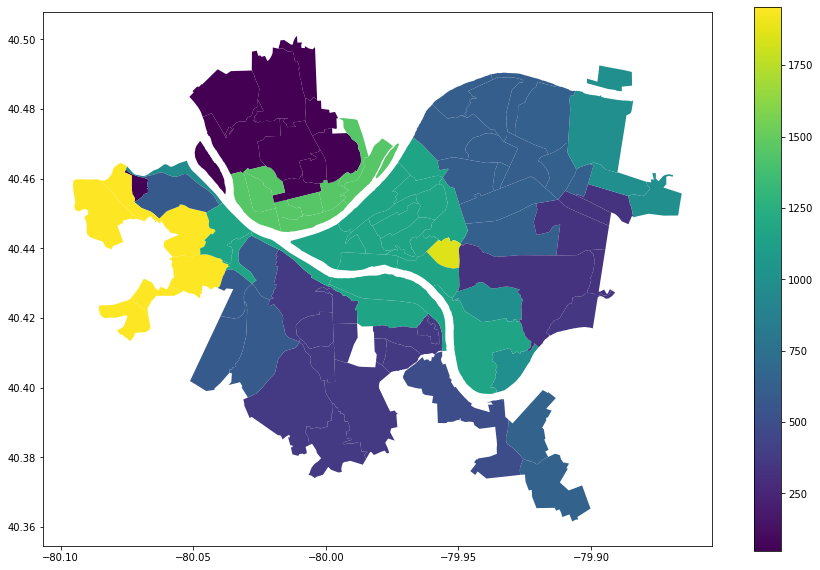

In [19]:
main_dataset.plot(column="Violations", legend=True, figsize=(15, 10))

Finally, let's put the data in order to see which areas have the most violations:

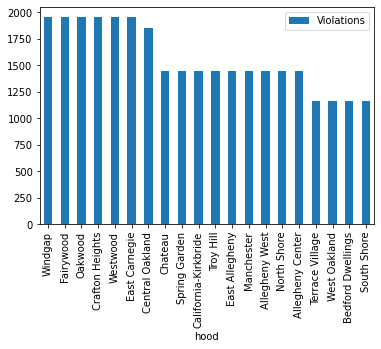

In [20]:
worst = main_dataset.sort_values("Violations", ascending=False)
worst = worst[["hood", "Violations"]]
worst = worst[0:20]
worst.plot.bar("hood", "Violations")

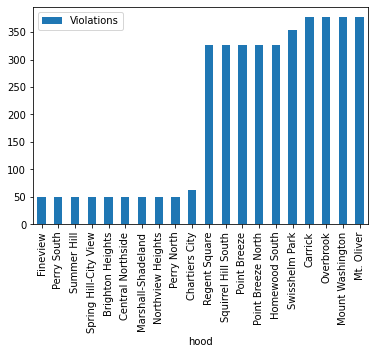

In [21]:
best = main_dataset.sort_values("Violations", ascending=True)
best = best[["hood", "Violations"]]
best = best[0:20]
best.plot.bar("hood", "Violations")

### Submetric #3: Conclusion/Results

Based on the above graphs, we see that neighborhoods like Windgap, Fairywood, Oakwood, Crafton Heights, Westwood, and East Carnegie all have the most food safety violations. It is important to note that this data is relative to the number of restaurants in each area/zip-code, so it is possible that some zip-codes simply have more restaurants than others. Nonetheless, the data presented here shows that these neighborhoods have the least food-safe prepared food dining options.

On the other hand, neighborhoods like Fineview, Perry South, Summer Hill, etc. belong to the area with the least food safety violations.